# Movies Dataset Analysis

### Objective: Understand factors affecting movie gross, top-performing writers, companies, and the relationship between score, votes, and revenue.



In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("movies.csv")

In [3]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


##  Data Cleaning  

In [4]:
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [6]:
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [7]:
df.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [8]:
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
 
df['released'] = df['released'].fillna(df['released'].mode()[0])
 
df['score'] = df['score'].fillna(df['score'].mean())

df['votes'] = df['votes'].fillna(df['votes'].mean())

df['writer'] = df['writer'].fillna(df['writer'].mode()[0])

df['star'] = df['star'].fillna(df['star'].mode()[0])

df['company'] = df['company'].fillna(df['company'].mode()[0])

df['country'] = df['country'].fillna(df['country'].mode()[0])

df['runtime'] = df['runtime'].fillna(df['runtime'].mean())

df['gross'] = df['gross'].fillna(df['gross'].mean())


In [9]:
df.drop(columns=['budget'], inplace=True)

In [10]:
df.isna().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
gross       0
company     0
runtime     0
dtype: int64

In [11]:
df['genre'] = df['genre'].replace('Music', 'Musical')


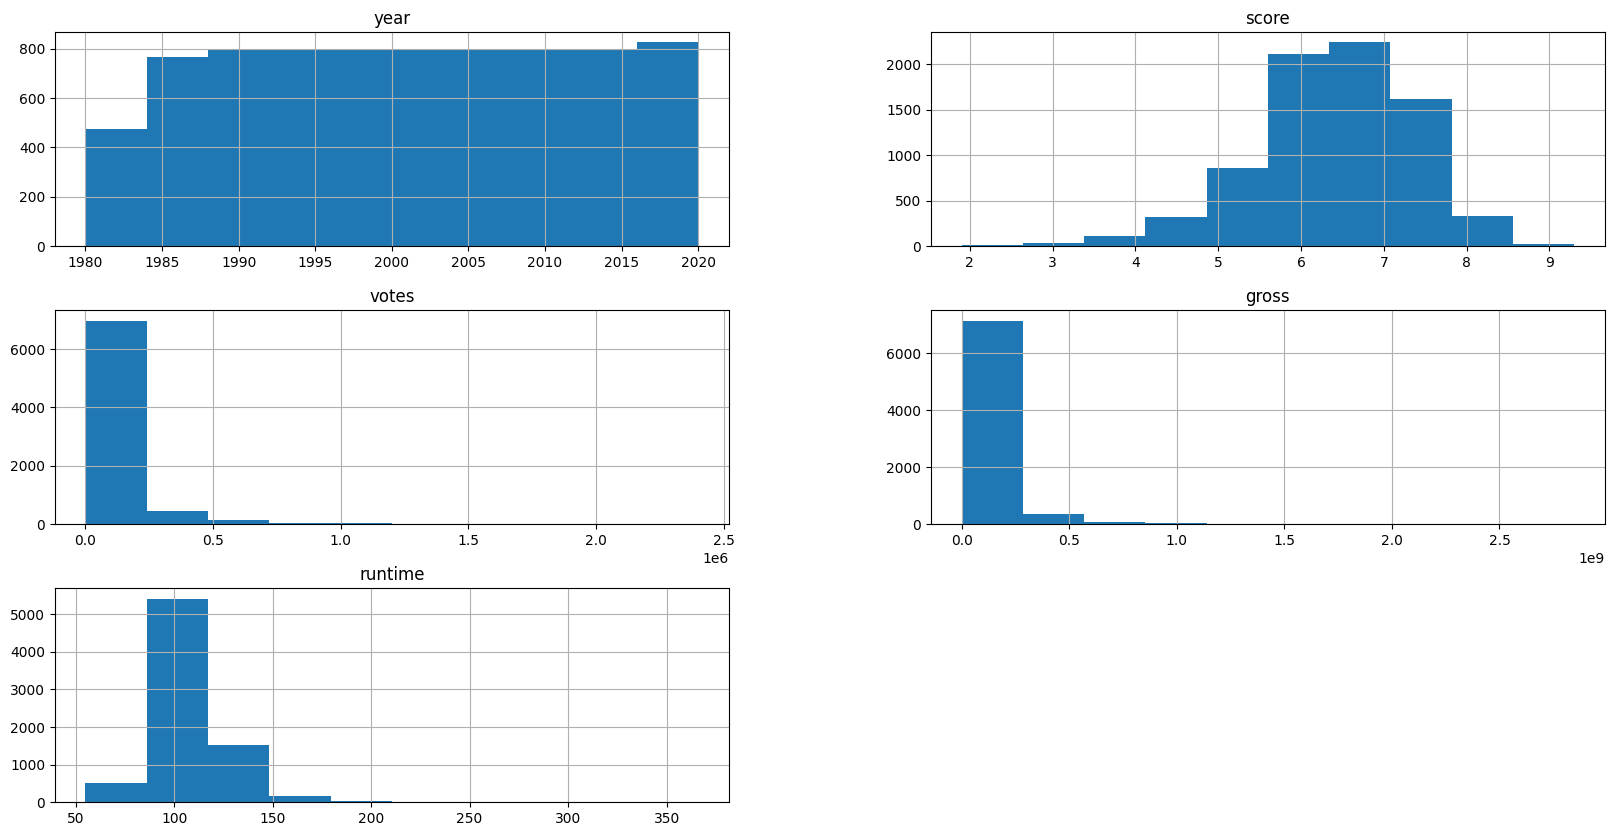

In [12]:
df.hist(bins = 10,figsize = (20,10))
plt.show()

## Exploratory Analysis  (EDA)

#### Line Plot: Average Gross Revenue Over the Years

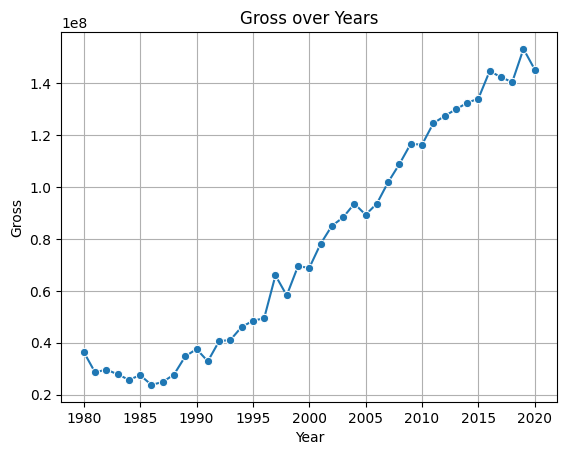

In [13]:
Grouped_year = df.groupby('year')['gross'].mean().reset_index()
sns.lineplot(x = 'year',y = 'gross',data  = Grouped_year,marker='o')
plt.xlabel('Year')
plt.ylabel('Gross')
plt.grid()
plt.title('Gross over Years')
plt.show()

#### Bar Plot: Average Gross Revenue by Genre


C:\Users\Dell\AppData\Local\Temp\ipykernel_16936\3950848619.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data =grouped_genre_gross,x='gross',y = 'genre' ,palette = 'viridis')


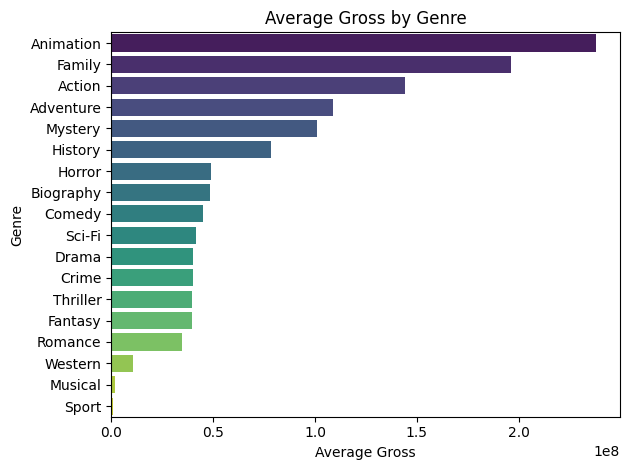

In [14]:
grouped_genre_gross = df.groupby('genre')['gross'].mean().reset_index()
grouped_genre_gross = grouped_genre_gross.sort_values(by = 'gross',ascending = False)
sns.barplot(data =grouped_genre_gross,x='gross',y = 'genre' ,palette = 'viridis')
plt.title('Average Gross by Genre')
plt.xlabel('Average Gross')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

#### Heatmap: Correlation Between Numerical Features


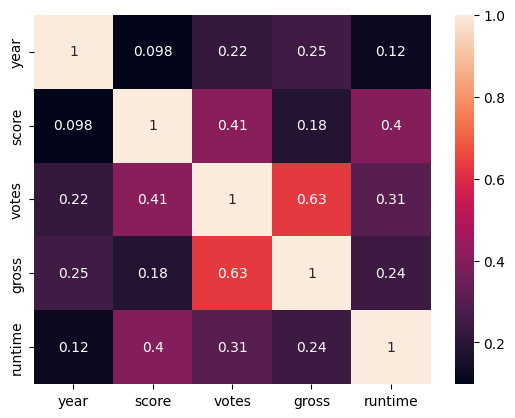

In [15]:
sns.heatmap(df.corr(numeric_only = True ),annot = True)
plt.show()

#### Line Plot: Relationship Between IMDB Score and Gross Revenue


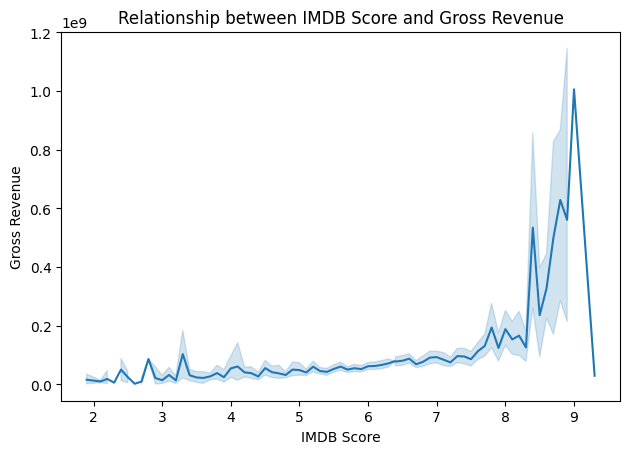

In [16]:
sns.lineplot(data=df, x='score', y='gross')
plt.title('Relationship between IMDB Score and Gross Revenue')
plt.xlabel('IMDB Score')
plt.ylabel('Gross Revenue')
plt.tight_layout()
plt.show()

#### Pair Plot: Relationships Between All Numerical Variables

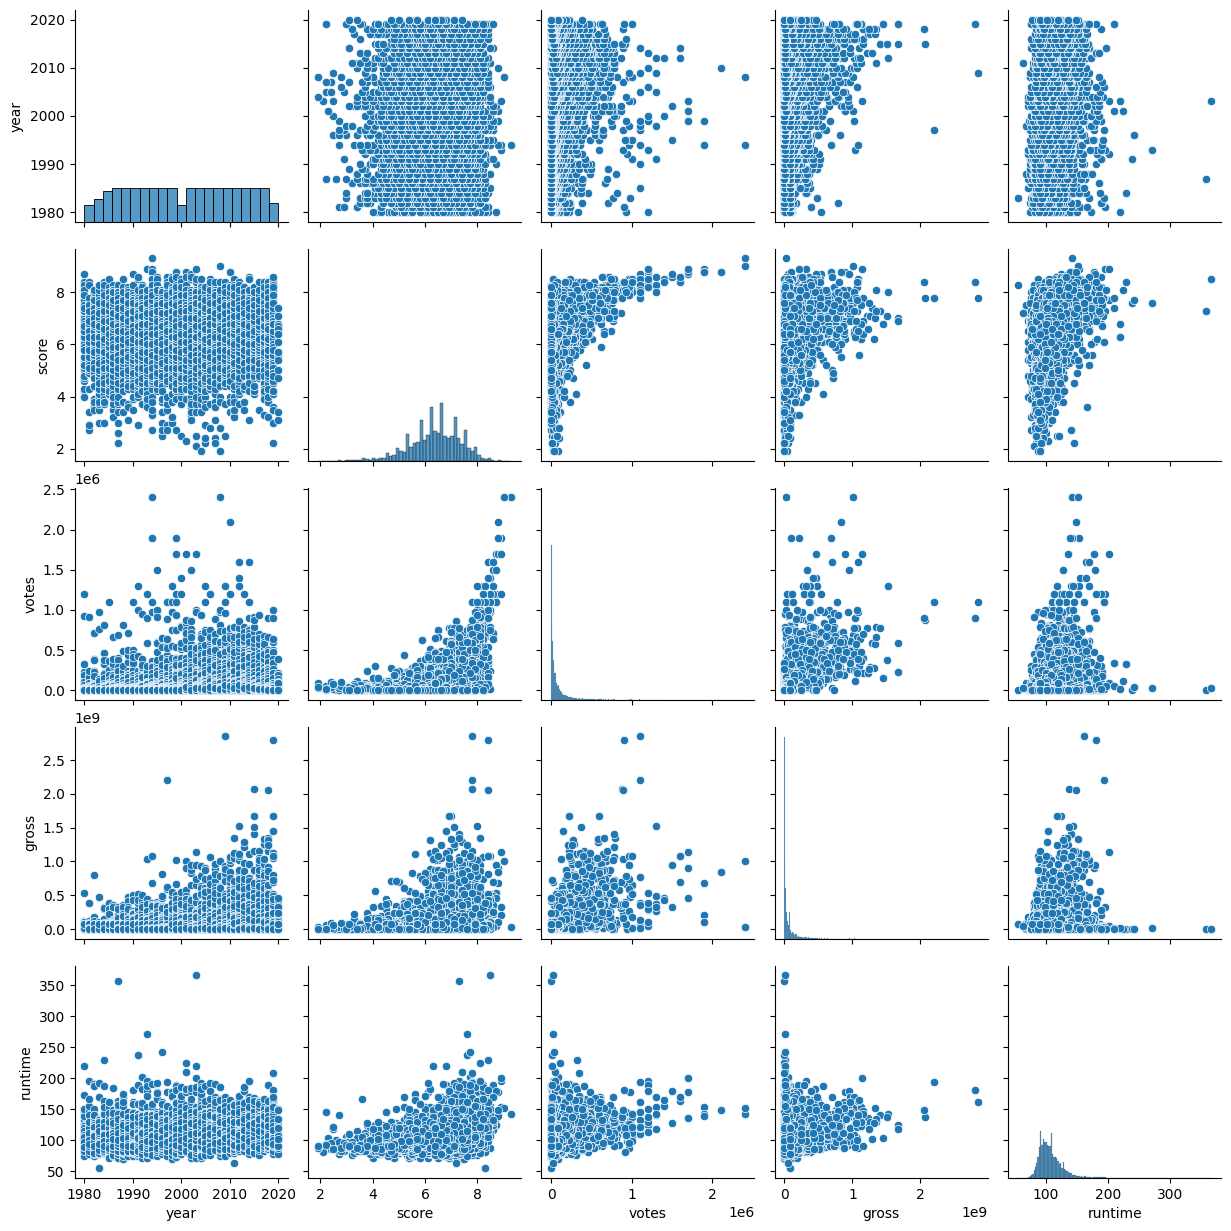

In [17]:
sns.pairplot(data = df)

#### Bar Plot: Top 10 Writers by Average Gross Revenue


C:\Users\Dell\AppData\Local\Temp\ipykernel_16936\3944270660.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top_10_writers,y= 'writer',x = 'gross',palette='crest')


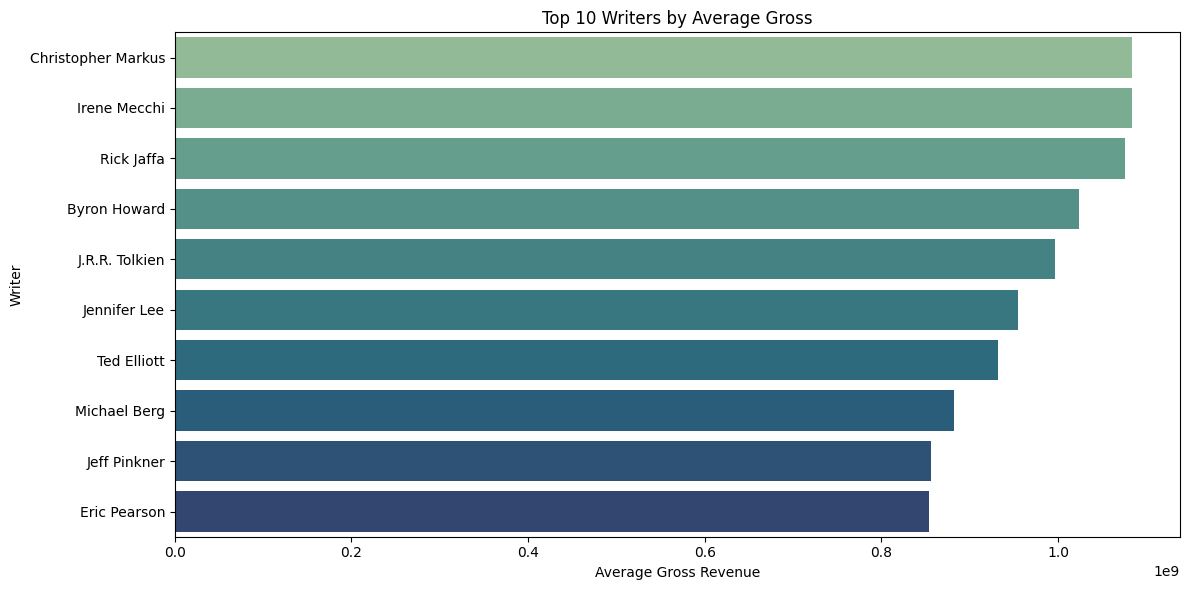

In [18]:
top_10_writers = df.groupby('writer')['gross'].mean().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data = top_10_writers,y= 'writer',x = 'gross',palette='crest')   
plt.title('Top 10 Writers by Average Gross')
plt.xlabel('Average Gross Revenue')
plt.ylabel('Writer')
plt.tight_layout()
plt.show()

#### Bar Plot: Top 10 Writers by Average Votes


C:\Users\Dell\AppData\Local\Temp\ipykernel_16936\1720533609.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top_10_writers_by_votes, x = 'votes',y = 'writer',palette= 'crest')


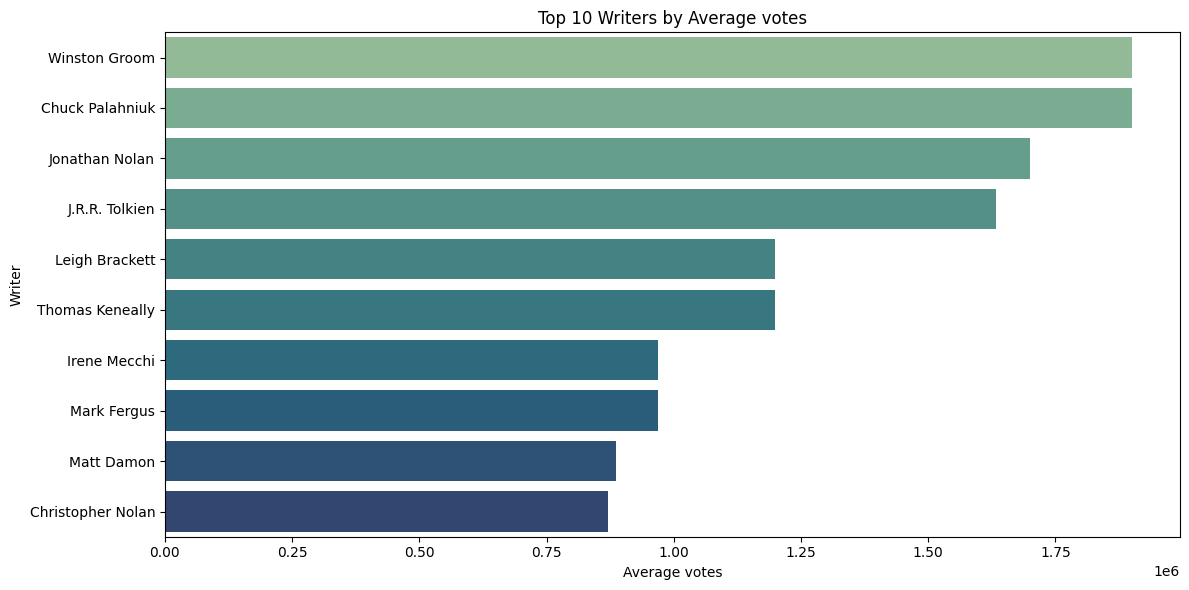

In [19]:
top_10_writers_by_votes  = df.groupby('writer')['votes'].mean().sort_values(ascending = False)\
.head(10).reset_index()
plt.figure(figsize=(12,6))
sns.barplot(data = top_10_writers_by_votes, x = 'votes',y = 'writer',palette= 'crest')
plt.title('Top 10 Writers by Average votes')
plt.xlabel('Average votes')
plt.ylabel('Writer')
plt.tight_layout()
plt.show()

#### Bar Plot: Top 10 Countries by Number of Movies Produced


C:\Users\Dell\AppData\Local\Temp\ipykernel_16936\435114006.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top_10_countries_movie_count , x = 'name', y = 'country',palette='crest')


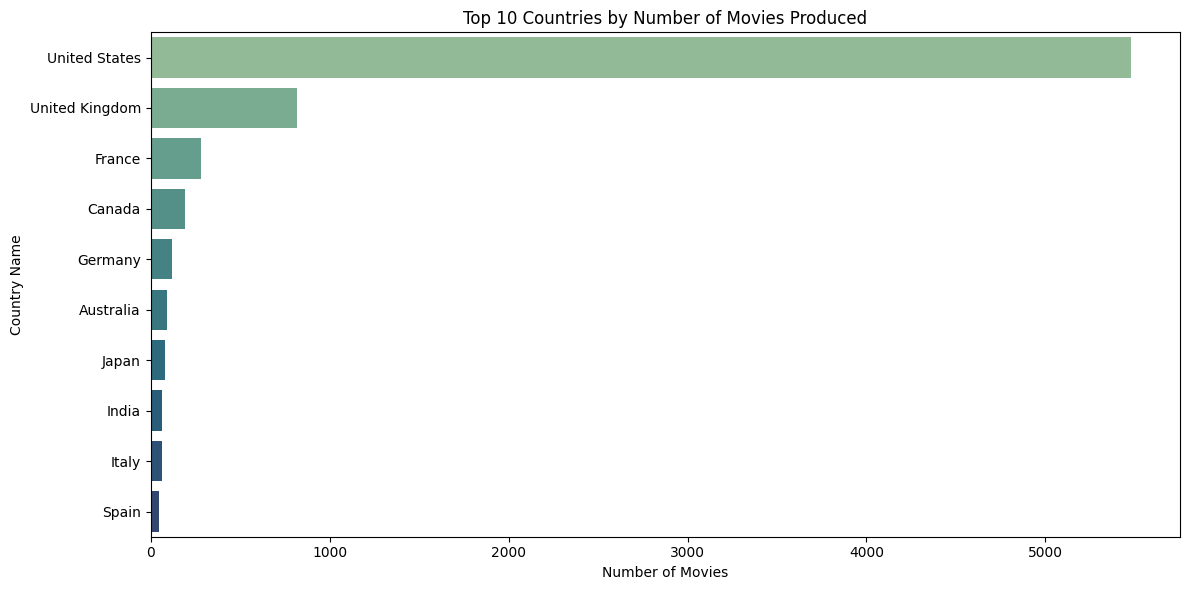

In [20]:
top_10_countries_movie_count = df.groupby('country')['name'].count()\
    .sort_values(ascending = False).head(10).reset_index()
plt.figure(figsize=(12,6))
sns.barplot(data = top_10_countries_movie_count , x = 'name', y = 'country',palette='crest')
plt.xlabel('Number of Movies')
plt.ylabel('Country Name')
plt.title('Top 10 Countries by Number of Movies Produced')
plt.tight_layout()
plt.show()

#### Bar Plot: Top 10  Companies by Average Gross Revenue


C:\Users\Dell\AppData\Local\Temp\ipykernel_16936\3592121428.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = Top_10_companies , x = 'gross' , y = 'company' , palette = 'crest')


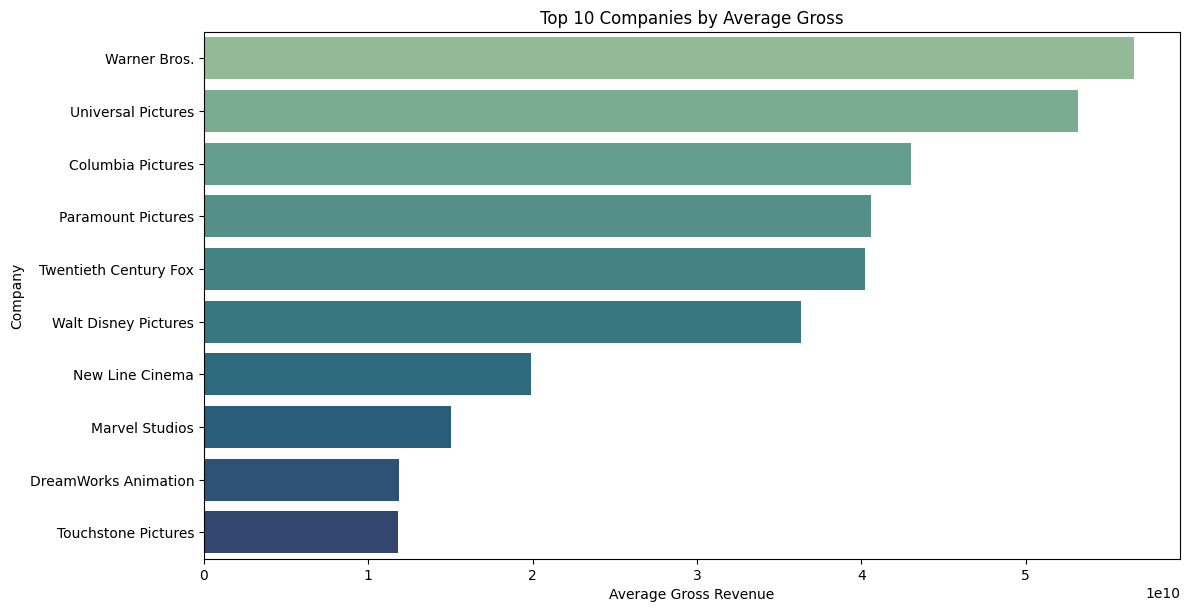

In [ ]:
Top_10_companies = df.groupby('company')['gross'].mean().\
    sort_values(ascending = False).reset_index().head(10)
plt.figure(figsize = (12,6))
sns.barplot(data = Top_10_companies , x = 'gross' , y = 'company' , palette = 'crest')
plt.tight_layout()
plt.title('Top 10 Companies by Average Gross')
plt.xlabel('Average Gross Revenue')
plt.ylabel('Company')
plt.show()

#### Scatter Plot with Regression Line: IMDB Score vs Gross Revenue


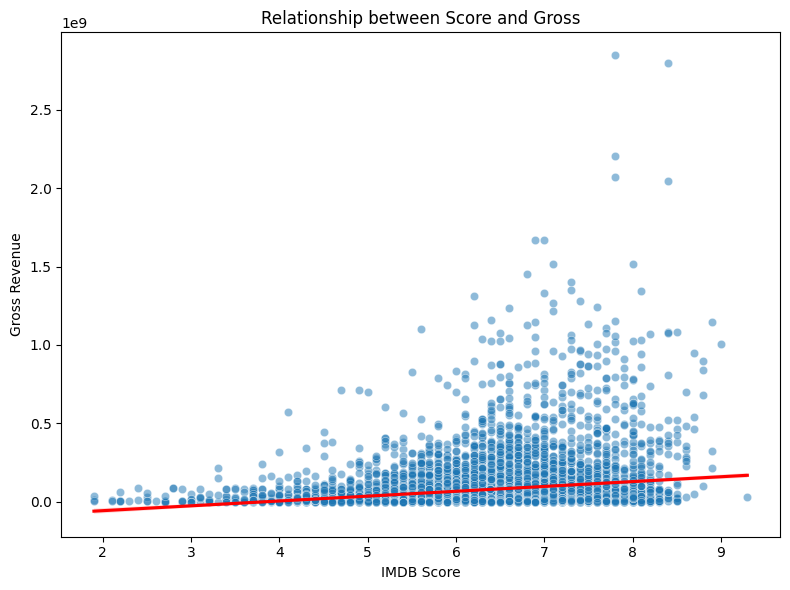

In [22]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='score', y='gross', alpha=0.5)
sns.regplot(data=df, x='score', y='gross', scatter=False, color='red')  
plt.title('Relationship between Score and Gross')
plt.xlabel('IMDB Score')
plt.ylabel('Gross Revenue')
plt.tight_layout()
plt.show()

#### Scatter Plot with Regression Line: Runtime vs Gross Revenue


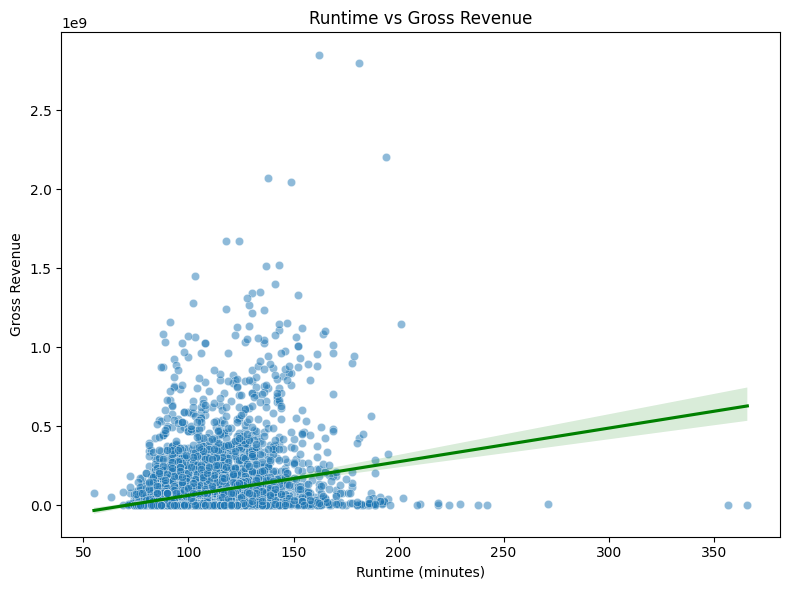

In [23]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='runtime', y='gross', alpha=0.5)
sns.regplot(data=df, x='runtime', y='gross', scatter=False, color='green')
plt.title('Runtime vs Gross Revenue')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Gross Revenue')
plt.tight_layout()
plt.show()

#### Line Plot: Number of Movies Produced Each Year

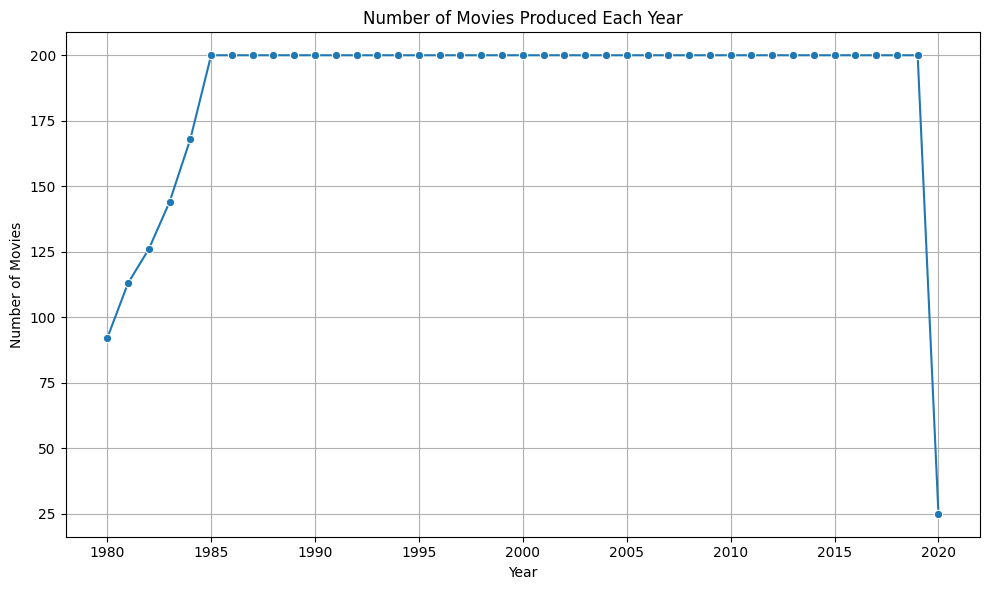

In [24]:
movie_count_by_year = df['year'].value_counts().reset_index()
movie_count_by_year.columns = ['year', 'count']
movie_count_by_year = movie_count_by_year.sort_values('year')
plt.figure(figsize=(10,6))
sns.lineplot(x=movie_count_by_year['year'], y=movie_count_by_year['count'], marker='o')
plt.title('Number of Movies Produced Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Bar Plot: Top 10 Production Companies by Genre Distribution


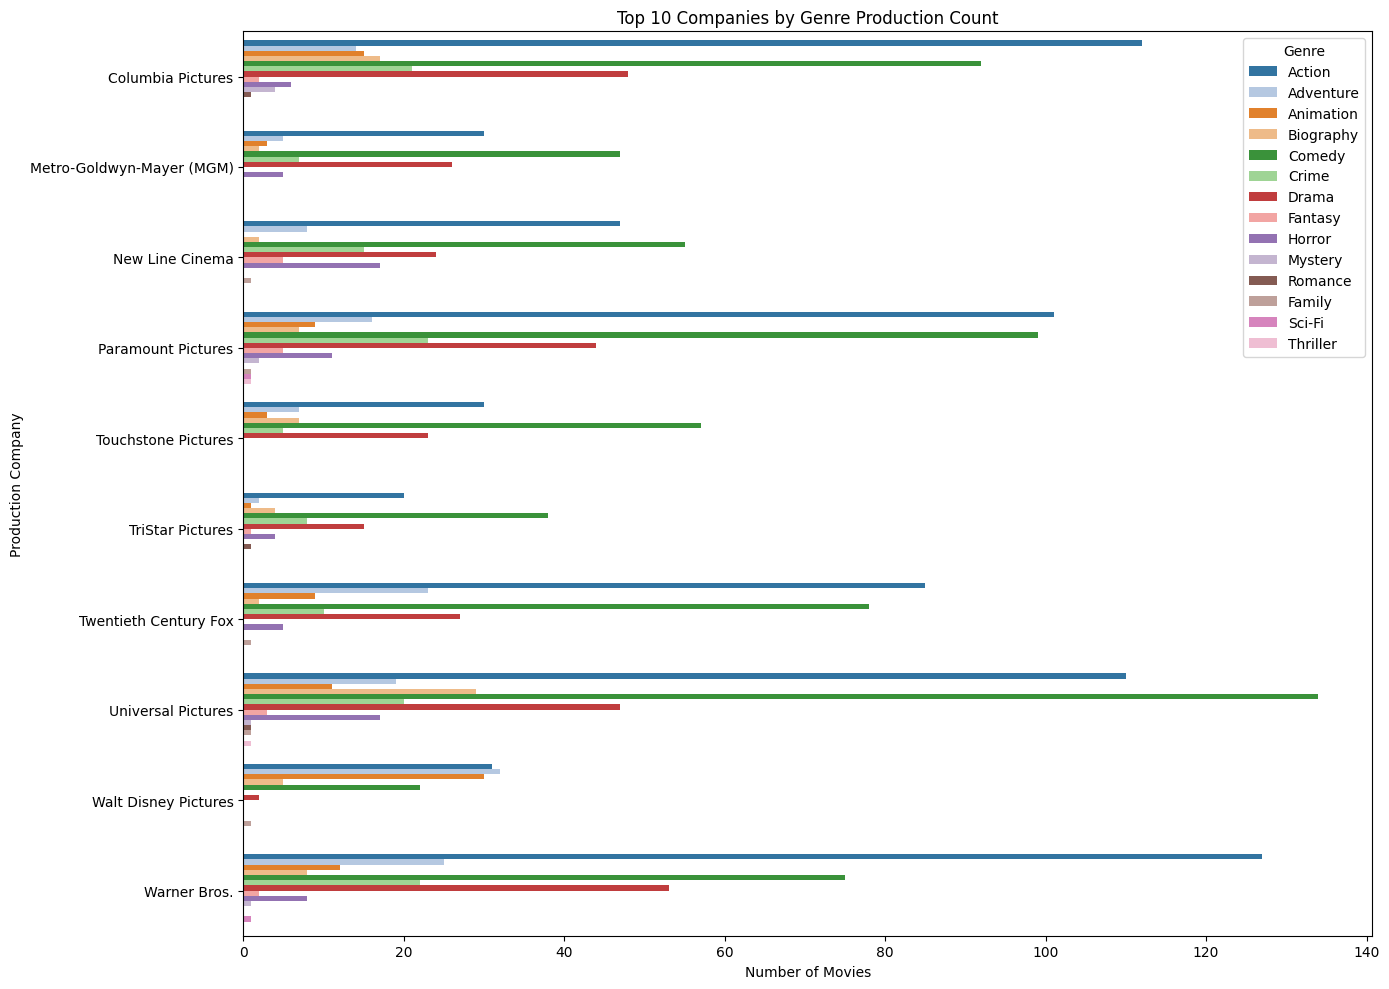

In [25]:
company_genre_counts = df.groupby(['company', 'genre']).size().reset_index(name='movie_count')
top_companies = company_genre_counts.groupby('company')['movie_count'].sum().sort_values(ascending=False).head(10).index
filtered = company_genre_counts[company_genre_counts['company'].isin(top_companies)]

plt.figure(figsize=(14,10))
sns.barplot(data=filtered, x='movie_count', y='company', hue='genre', palette='tab20')
plt.title('Top 10 Companies by Genre Production Count')
plt.xlabel('Number of Movies')
plt.ylabel('Production Company')
plt.legend(title='Genre')
plt.tight_layout()
plt.show()


# Final Summary: Insights & Recommendations


## Key Insights


##### - **Gross Over Years**: Average gross revenue showed a steady increase until 2016, followed by a decline. A notable spike occurred in 2019, marking the peak of movie earnings. However, in 2020, there was a sharp drop likely due to the COVID-19 pandemic's impact on global cinema operations.

##### - **Average Gross Revenue By Genre**:Adventure and Family genres consistently generate the highest average gross revenue, indicating strong audience appeal and commercial viability. On the other hand, genres like Music and Sport appear to have the lowest average gross, suggesting limited market traction or niche appeal.

##### - **Correlations**: 'votes' and 'gross' show the strongest positive correlation among numeric features.

#####  **IMDB Score vs Gross Revenue**:  While the overall correlation between IMDB score and gross revenue is weakly positive, a closer look reveals an interesting pattern: Gross revenue remains relatively stable across low to mid scores, but shows a **sharp increase starting at score 8.5**, peaking around score 9.    Surprisingly, it **drops significantly beyond score 9**, suggesting that extremely high-rated movies may not always translate into higher box office earnings.

##### **Top Writers by Gross Revenue**
##### A small group of writers consistently produce high-grossing films.Interestingly, the top 10 writers are **very close in performance**, with only slight differences in their average gross revenue.This indicates a competitive tier of elite writers who are capable of delivering strong commercial success.

##### **Top Writers by Votes (Popularity)**
##### The top 10 writers have relatively close average vote counts, indicating that audience engagement is evenly distributed among them.


##### **Top Countries by Movie Production**
##### The USA leads by a significant margin in the number of movies produced, far exceeding all other countries.This dominance reflects the strength and scale of the Hollywood film industry.

##### **Top Companies by Average Gross Revenue**
##### Marvel stands out with the highest average gross revenue, significantly ahead of other companies.The remaining companies show a steady decline, with the bottom 5 being very close in performance.

##### **Movie Production Trends Over the Years**
##### There was a notable increase in movie production from 1980 to 1985.From 1985 to 2019, production remained consistently high.However, a sharp drop occurred in 2020, likely due to the COVID-19 pandemic's global impact on the film industry.




## Strategic Recommendations

#### **Focus on High-Gross Genres**:  
#### Invest more in producing Adventure and Family films, as they consistently show the highest average gross returns.  Studios should allocate larger budgets to these genres for better commercial performance.

#### **Optimize Around IMDB Scores 8–9**:  
#### Movies scoring between 8 and 9 show peak gross performance.This suggests a sweet spot where quality meets mass appeal.Target this range through better scripting, casting, and audience testing.

#### **Leverage the U.S. Market**:  
#### The U.S. is by far the leading country in movie production.Studios outside the U.S. should explore partnerships or distribution deals in the American market to maximize reach.

#### **Post-COVID Planning is Crucial**:  
#### The 2020 drop in production and revenue highlights the need for adaptive strategies.  Invest in hybrid release models (cinema + streaming), build resilient production pipelines, and plan for crisis flexibility.

#### **Combine Popularity & Profit Metrics**:
#### Don’t rely on votes or ratings alone.Use a balanced approach that considers gross revenue, audience engagement, and genre alignment for green-lighting future projects.

